In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df1=df.copy()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can see that 32 numbered column is null so we will drop that column

In [6]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [7]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

we don't want to use id column so we will drop that 

In [8]:
df.drop('id',axis=1,inplace=True)

finding out numerical and categorical columns


In [9]:
def numeric_features(df):
    numeric_col = df.select_dtypes(include=np.number).columns.tolist()
    return df[numeric_col].head()
numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)

Numerical Features:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_w

In [10]:
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)

Categorical Features:
  diagnosis
0         M
1         M
2         M
3         M
4         M


there are no categorical columns in the dataset

The next step is to map the diagnosis column M(Malignant) for 1 and B(Benign) for 0

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now there are two ways to continue our analyisis  
first what we can do is we keep all features together and start the analysis
The other thing what we can do is we can see our data has three parts one for mean second for se and thrid for worst ,so what we can do is divide them into three sections and work accordingly


I will start with the first part and then jump to second

Starting with EDA

In [13]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:>

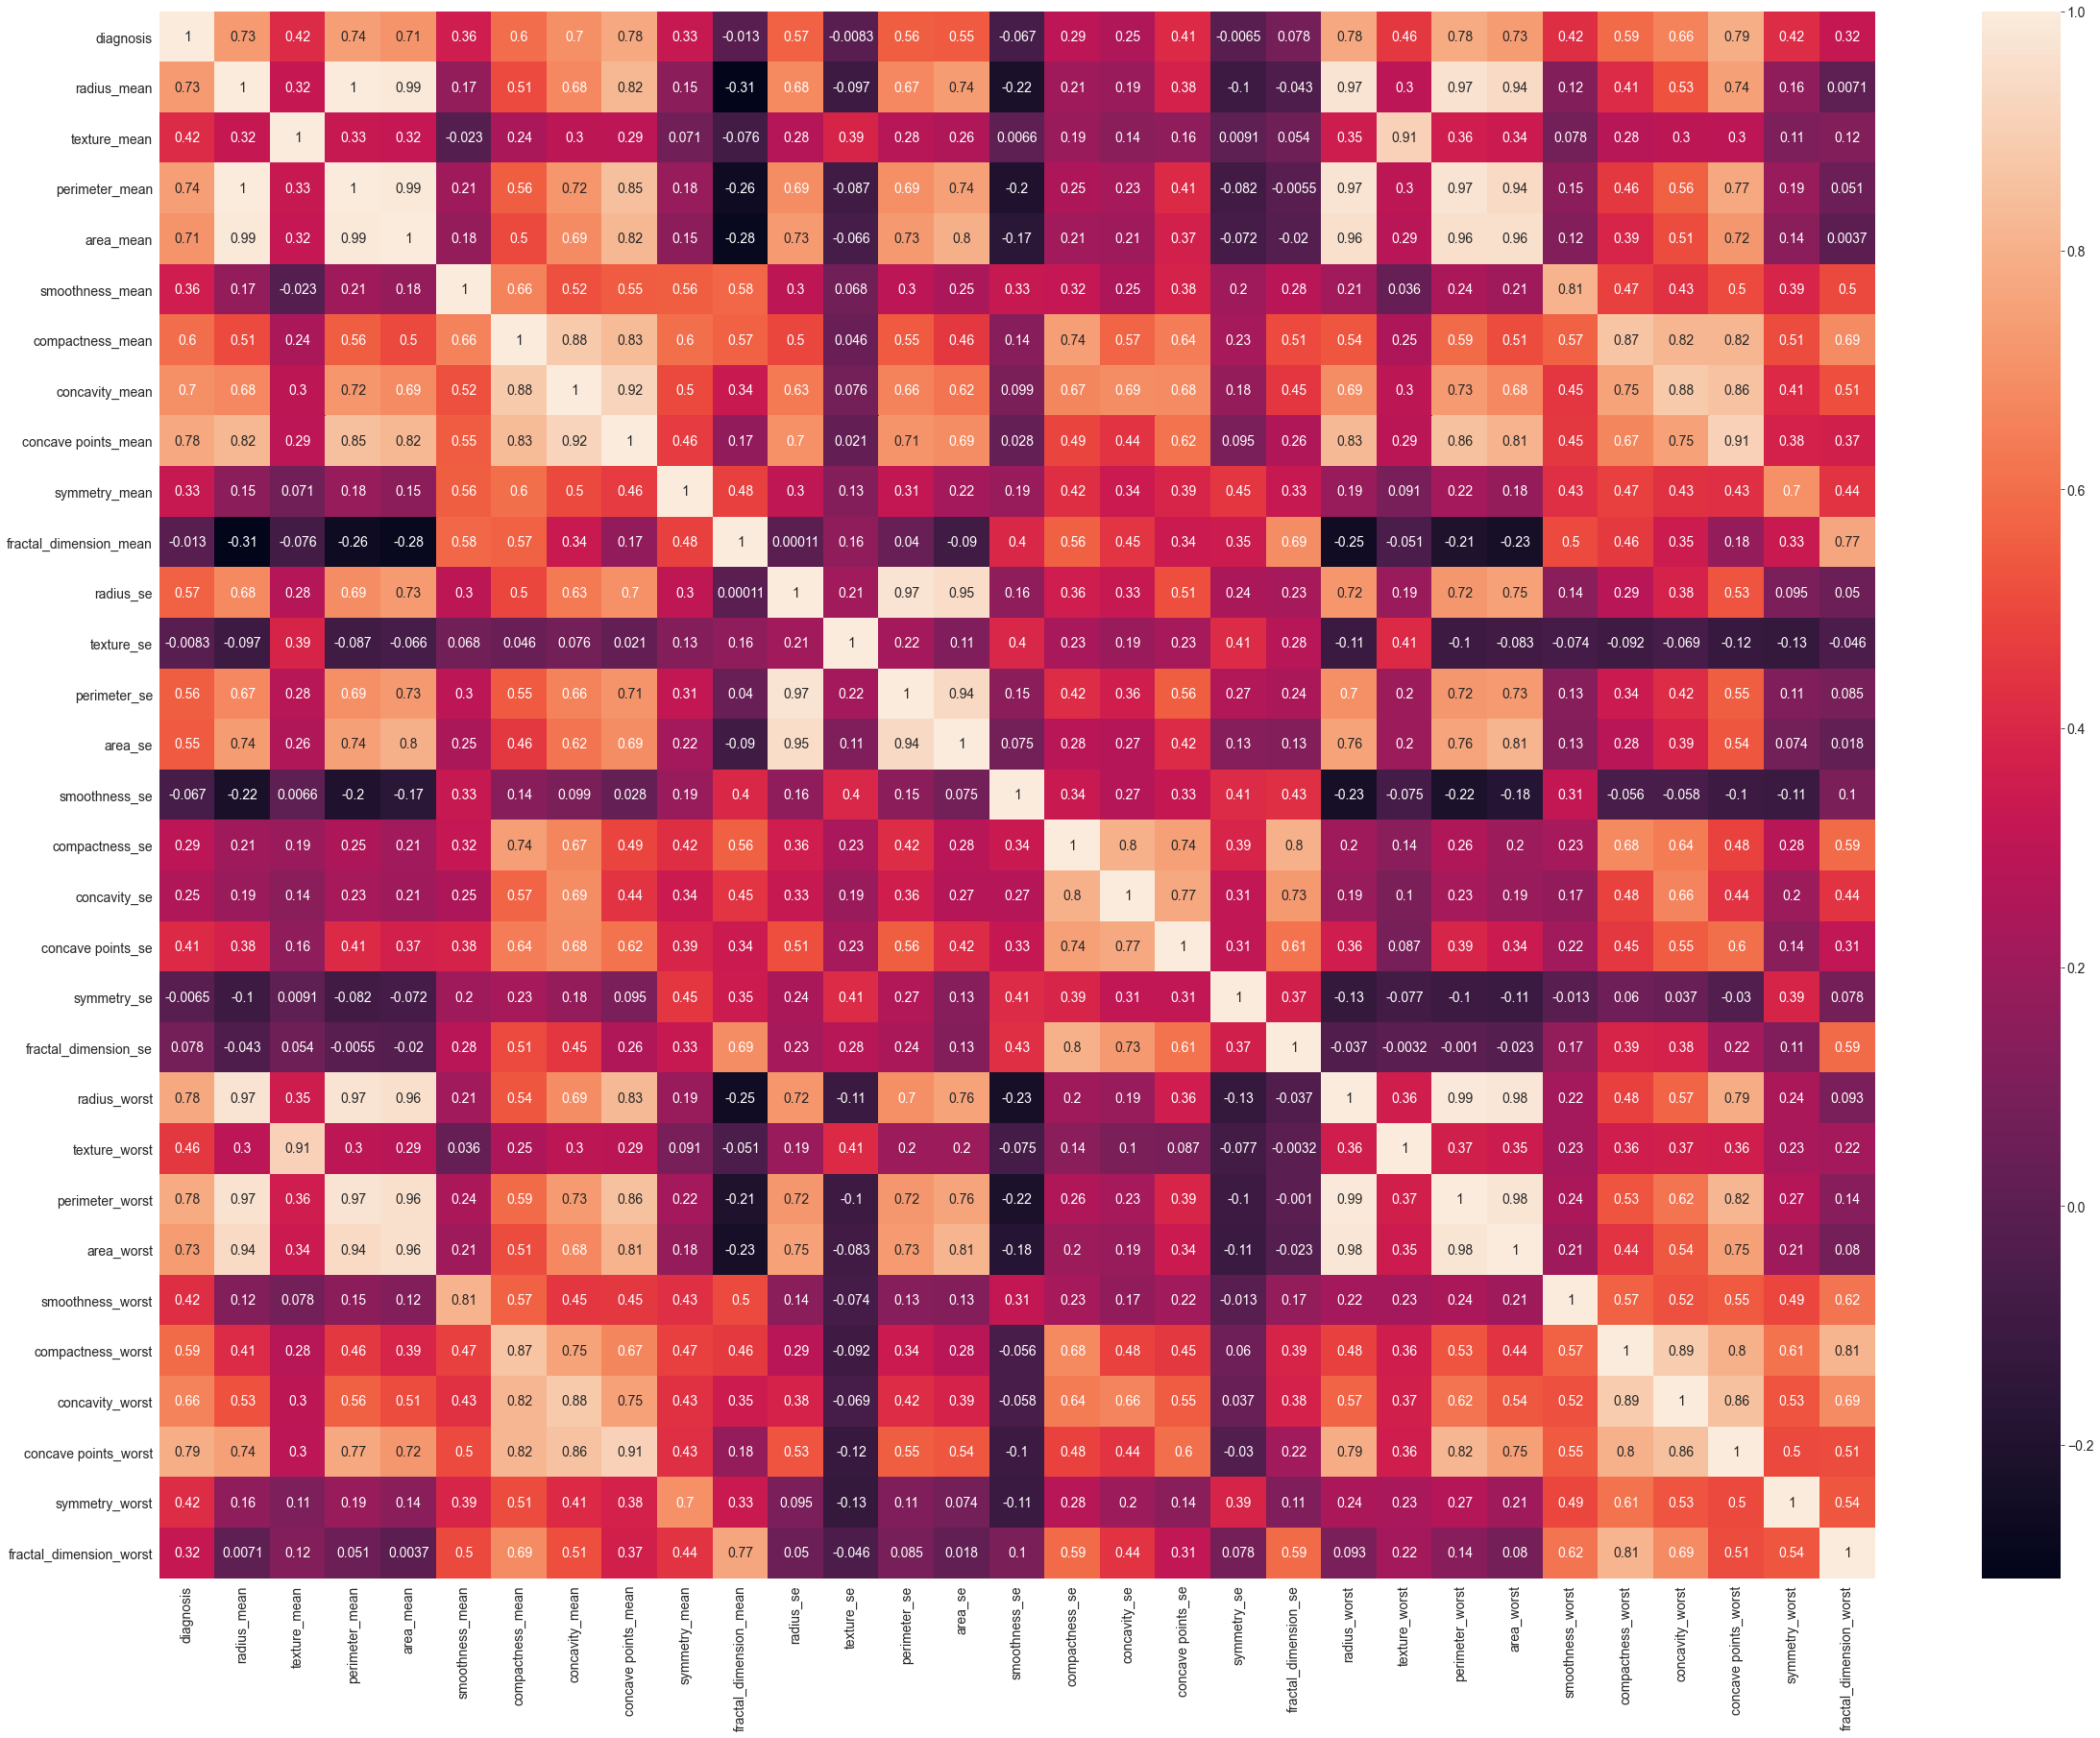

In [14]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

We can see collinearity between mean and worst columns so we will visulaize them

In [15]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<AxesSubplot:>

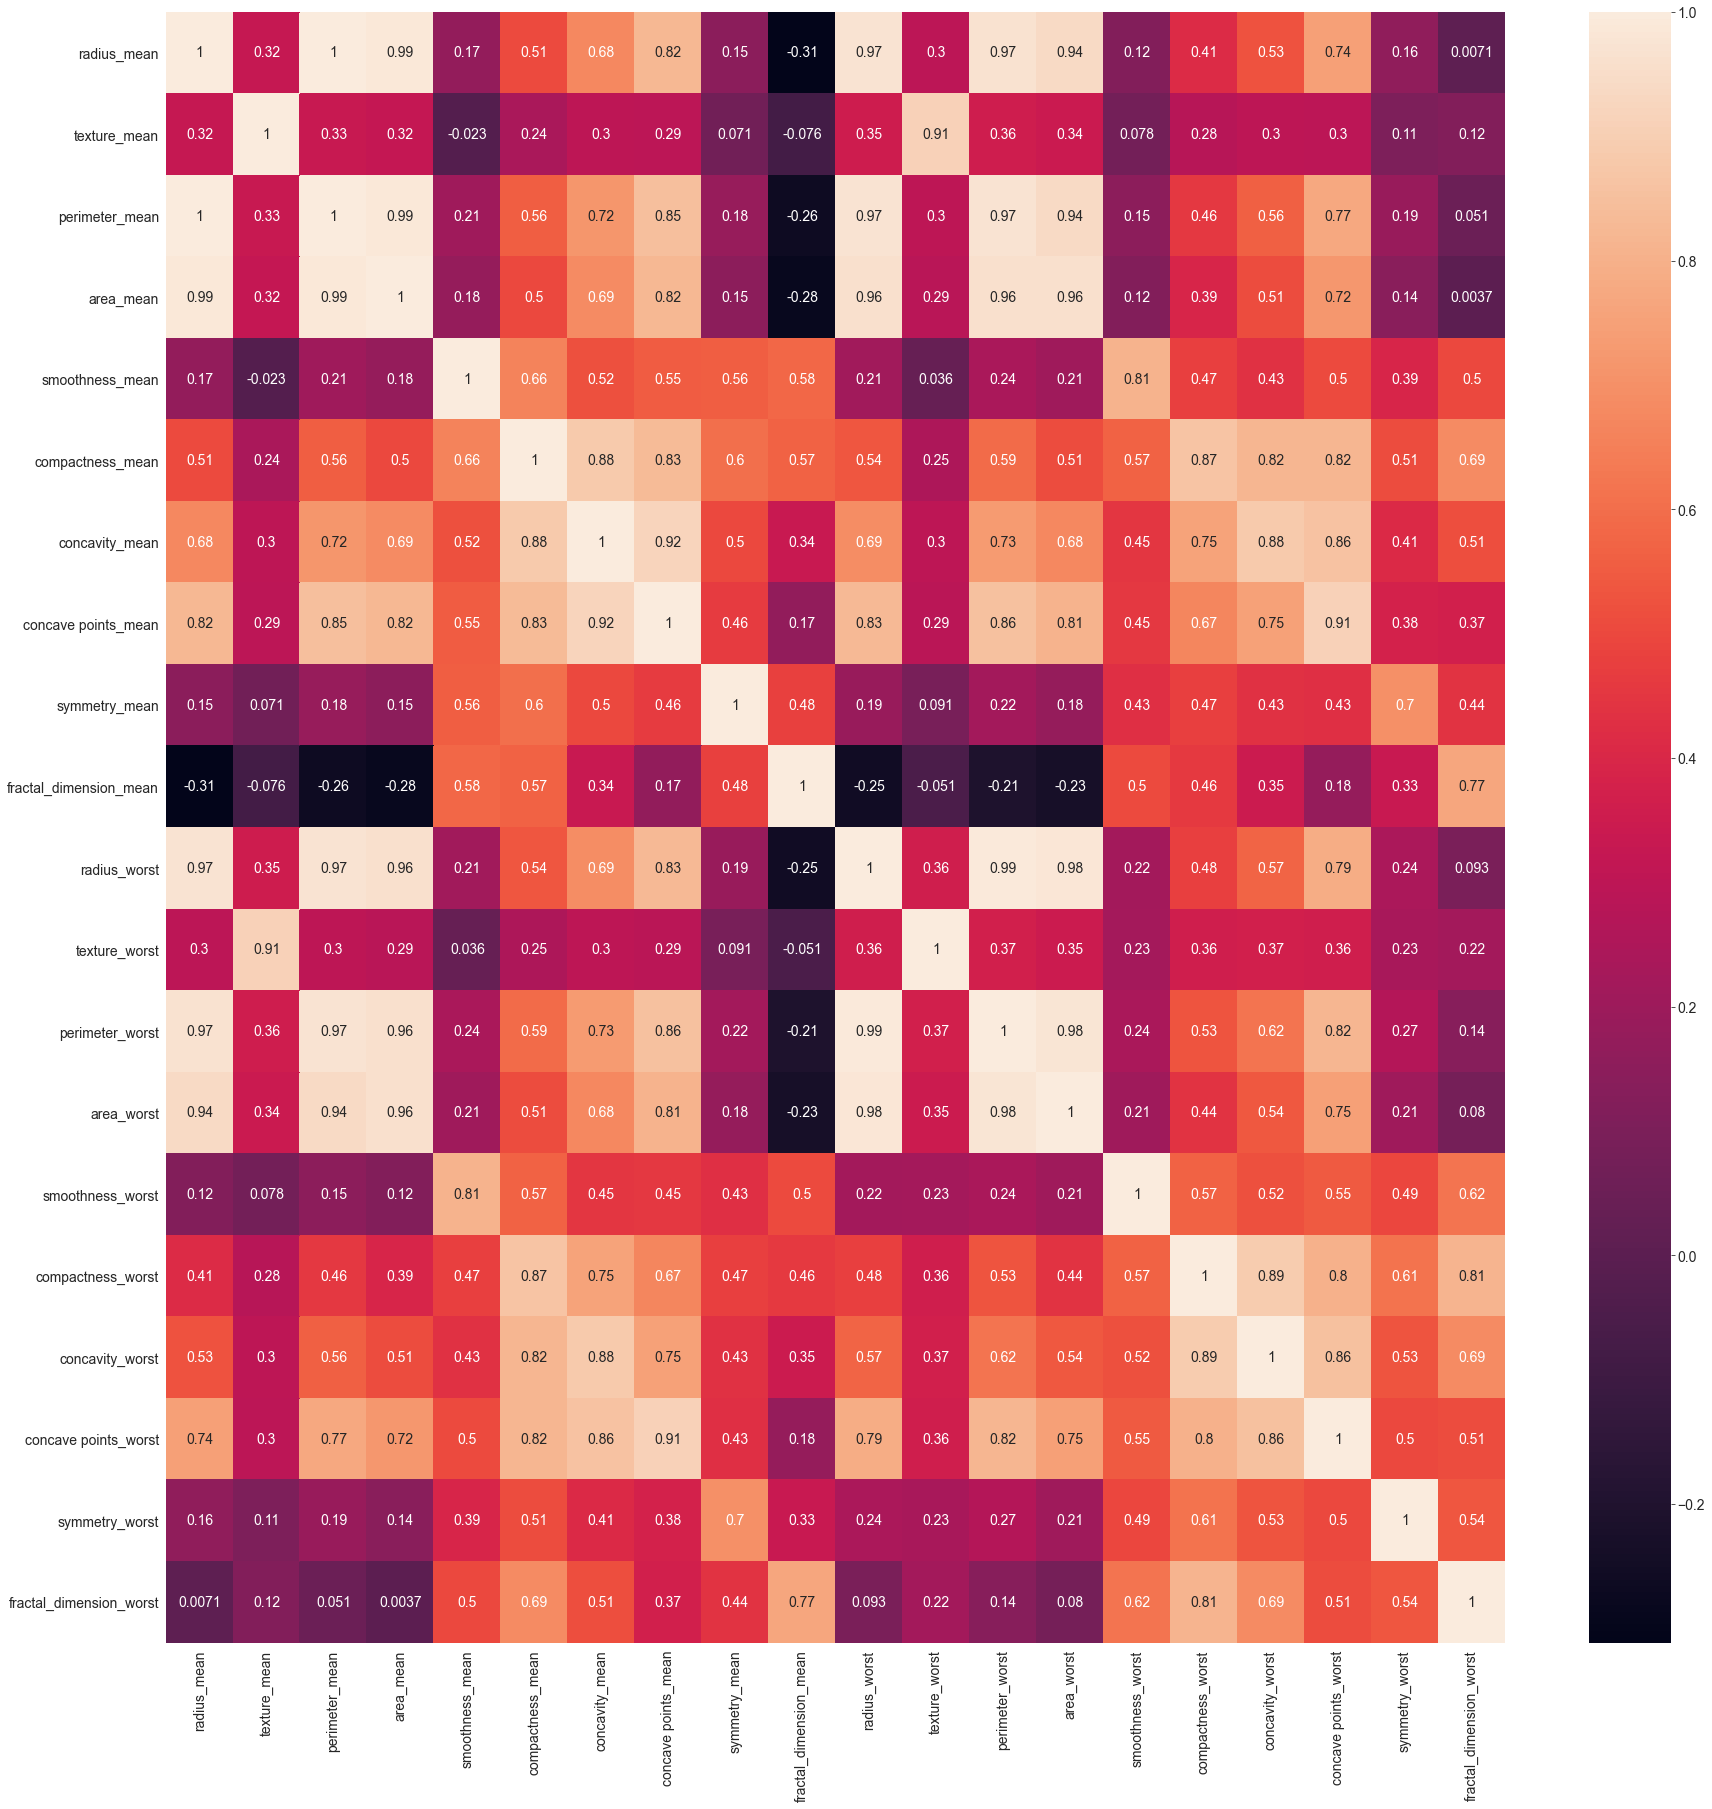

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(df[features_mean+features_worst].corr(),annot=True)

there is high collinearity between mean and worst so we will drop the worst columns when predicting

countplot for diagnosis

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

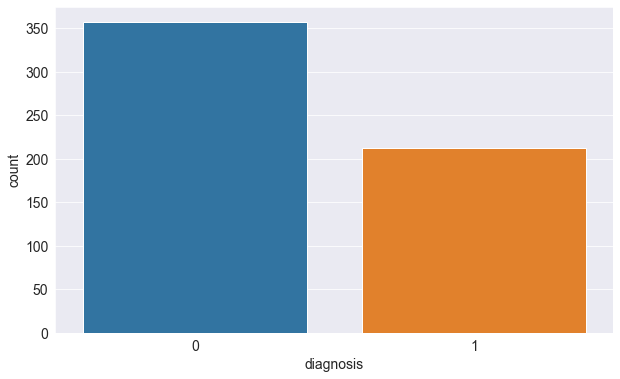

In [17]:
sns.countplot(x='diagnosis',data=df)

In [18]:
fig = px.pie(df, names='diagnosis')
fig.show()

it is vey tough to read this heatmap because of so many column so we will divide it into those categories so that we can understand that data more .

In [19]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


we will start with mean first

<AxesSubplot:>

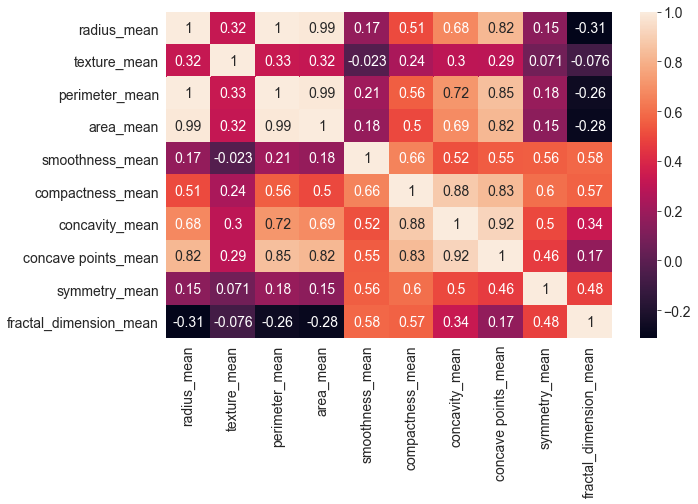

In [20]:
sns.heatmap(df[features_mean].corr(),annot=True)

since we can se there are columns which have high correlation so what we can do is choose one of them and drop the other one

* perimeter_mean ,radius_mean, area_mean have high correlation so we will only use radius_mean
* compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
* so selected Parameter for use is radius_mean, texture_mean, compactness_mean, symmetry_mean

In [21]:
fig = px.scatter_matrix(df, dimensions=["radius_mean", "texture_mean", "compactness_mean", "symmetry_mean"], color="diagnosis",width=800,height=1000)
fig.show()

In [22]:
fig = px.box(df, x=["radius_mean","texture_mean","compactness_mean","symmetry_mean"], color="diagnosis", notched=True)
fig.show()

same for se and worst columns

<AxesSubplot:>

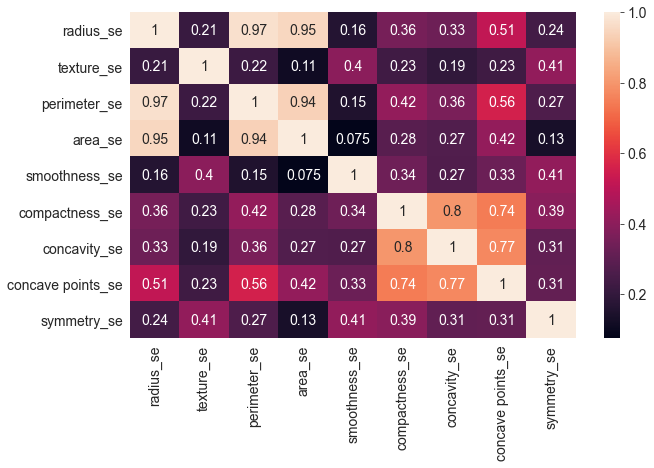

In [23]:
sns.heatmap(df[features_se].corr(),annot=True)

the columns that show high correlation we will drop them


so selected Parameter for use is radius_se, texture_se, compactness_se, symmetry_se

In [24]:
fig = px.scatter_matrix(df, dimensions=["radius_se", "texture_se", "compactness_se", "symmetry_se"], color="diagnosis",width=800,height=1000)
fig.show()

In [25]:
fig = px.box(df, x=["radius_se","texture_se","compactness_se","symmetry_se"], color="diagnosis", notched=True)
fig.show()

now for worst columns

<AxesSubplot:>

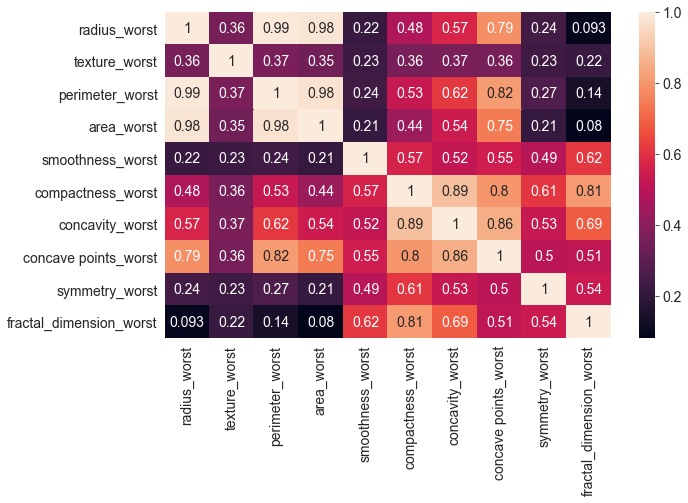

In [26]:
sns.heatmap(df[features_worst].corr(),annot=True)

so selected Parameter for use is radius_worst, texture_worst, compactness_worst, symmetry_worst

In [27]:
fig = px.scatter_matrix(df, dimensions=["radius_worst", "texture_worst", "compactness_worst", "symmetry_worst"], color="diagnosis",width=800,height=1000)
fig.show()

In [28]:
fig = px.box(df, x=["radius_mean","texture_mean","compactness_mean","symmetry_mean"], color="diagnosis", notched=True)
fig.show()

Now making a model for prediction

In [29]:
!pip install scikit-learn --upgrade --quiet

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)

In [32]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (426, 31)
val_df.shape : (143, 31)
test_df.shape : (114, 31)


In [33]:
train_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
287          0       12.890         13.12           81.89      515.9   
512          1       13.400         20.52           88.64      556.7   
402          0       12.960         18.29           84.18      525.2   
446          1       17.750         28.03          117.30      981.6   
210          1       20.580         22.14          134.70     1290.0   
..         ...          ...           ...             ...        ...   
71           0        8.888         14.64           58.79      244.0   
106          0       11.640         18.33           75.17      412.5   
270          0       14.290         16.82           90.30      632.6   
435          1       13.980         19.62           91.12      599.5   
102          0       12.180         20.52           77.22      458.7   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
287          0.06955           0.03729         0.02260              0.01171   
512          0.11060           0.14690         0.14450              0.08172   
402          0.07351           0.07899         0.04057              0.01883   
446          0.09997           0.13140         0.16980              0.08293   
210          0.09090           0.13480         0.16400              0.09561   
..               ...               ...             ...                  ...   
71           0.09783           0.15310         0.08606              0.02872   
106          0.11420           0.10170         0.07070              0.03485   
270          0.06429           0.02675         0.00725              0.00625   
435          0.10600           0.11330         0.11260              0.06463   
102          0.08013           0.04038         0.02383              0.01770   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
287         0.1337  ...        13.620          15.54            87.40   
512         0.2116  ...        16.410          29.66           113.30   
402         0.1874  ...        14.130          24.61            96.31   
446         0.1713  ...        21.530          38.54           145.40   
210         0.1765  ...        23.240          27.84           158.30   
..             ...  ...           ...            ...              ...   
71          0.1902  ...         9.733          15.67            62.56   
106         0.1801  ...        13.140          29.26            85.51   
270         0.1508  ...        14.910          20.65            94.44   
435         0.1669  ...        17.040          30.80           113.90   
102         0.1739  ...        13.340          32.84            84.58   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
287       577.0           0.09616            0.11470          0.11860   
512       844.4           0.15740            0.38560          0.51060   
402       621.9           0.09329            0.23180          0.16040   
446      1437.0           0.14010            0.37620          0.63990   
210      1656.0           0.11780            0.29200          0.38610   
..          ...               ...                ...              ...   
71        284.4           0.12070            0.24360          0.14340   
106       521.7           0.16880            0.26600          0.28730   
270       684.6           0.08567            0.05036          0.03866   
435       869.3           0.16130            0.35680          0.40690   
102       547.8           0.11230            0.08862          0.11450   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
287               0.05366          0.2309                  0.06915  
512               0.20510          0.3585                  0.11090  
402               0.06608          0.3207                  0.07247  
446               0.19700          0.2972                  0.09075  
210               0.19200          0.2909                  0.05865  
..                    .

In [34]:
val_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
204          0        12.47         18.60           81.09      481.9   
70           1        18.94         21.31          123.60     1130.0   
131          1        15.46         19.48          101.70      748.9   
431          0        12.40         17.68           81.47      467.8   
540          0        11.54         14.44           74.65      402.9   
..         ...          ...           ...             ...        ...   
89           0        14.64         15.24           95.77      651.9   
199          1        14.45         20.22           94.49      642.7   
411          0        11.04         16.83           70.92      373.2   
18           1        19.81         22.15          130.00     1260.0   
390          0        10.26         12.22           65.75      321.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
204          0.09965           0.10580         0.08005              0.03821   
70           0.09009           0.10290         0.10800              0.07951   
131          0.10920           0.12230         0.14660              0.08087   
431          0.10540           0.13160         0.07741              0.02799   
540          0.09984           0.11200         0.06737              0.02594   
..               ...               ...             ...                  ...   
89           0.11320           0.13390         0.09966              0.07064   
199          0.09872           0.12060         0.11800              0.05980   
411          0.10770           0.07804         0.03046              0.02480   
18           0.09831           0.10270         0.14790              0.09498   
390          0.09996           0.07542         0.01923              0.01968   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
204         0.1925  ...         14.97          24.64            96.05   
70          0.1582  ...         24.86          26.58           165.90   
131         0.1931  ...         19.26          26.00           124.90   
431         0.1811  ...         12.88          22.91            89.61   
540         0.1818  ...         12.26          19.68            78.78   
..             ...  ...           ...            ...              ...   
89          0.2116  ...         16.34          18.24           109.40   
199         0.1950  ...         18.33          30.12           117.90   
411         0.1714  ...         12.41          26.44            79.93   
18          0.1582  ...         27.32          30.88           186.80   
390         0.1800  ...         11.38          15.65            73.23   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
204       677.9            0.1426             0.2378          0.26710   
70       1866.0            0.1193             0.2336          0.26870   
131      1156.0            0.1546             0.2394          0.37910   
431       515.8            0.1450             0.2629          0.24030   
540       457.8            0.1345             0.2118          0.17970   
..          ...               ...                ...              ...   
89        803.6            0.1277             0.3089          0.26040   
199      1044.0            0.1552             0.4056          0.49670   
411       471.4            0.1369             0.1482          0.10670   
18       2398.0            0.1512             0.3150          0.53720   
390       394.5            0.1343             0.1650          0.08615   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
204               0.10150          0.3014                  0.08750  
70                0.17890          0.2551                  0.06589  
131               0.15140          0.2837                  0.08019  
431               0.07370          0.2556                  0.09359  
540               0.06918          0.2329                  0.08134  
..                    .

In [35]:
test_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
204          0        12.47         18.60           81.09      481.9   
70           1        18.94         21.31          123.60     1130.0   
131          1        15.46         19.48          101.70      748.9   
431          0        12.40         17.68           81.47      467.8   
540          0        11.54         14.44           74.65      402.9   
..         ...          ...           ...             ...        ...   
486          0        14.64         16.85           94.21      666.0   
75           1        16.07         19.65          104.10      817.7   
249          0        11.52         14.93           73.87      406.3   
238          0        14.22         27.85           92.55      623.9   
265          1        20.73         31.12          135.70     1419.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
204          0.09965           0.10580         0.08005              0.03821   
70           0.09009           0.10290         0.10800              0.07951   
131          0.10920           0.12230         0.14660              0.08087   
431          0.10540           0.13160         0.07741              0.02799   
540          0.09984           0.11200         0.06737              0.02594   
..               ...               ...             ...                  ...   
486          0.08641           0.06698         0.05192              0.02791   
75           0.09168           0.08424         0.09769              0.06638   
249          0.10130           0.07808         0.04328              0.02929   
238          0.08223           0.10390         0.11030              0.04408   
265          0.09469           0.11430         0.13670              0.08646   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
204         0.1925  ...         14.97          24.64            96.05   
70          0.1582  ...         24.86          26.58           165.90   
131         0.1931  ...         19.26          26.00           124.90   
431         0.1811  ...         12.88          22.91            89.61   
540         0.1818  ...         12.26          19.68            78.78   
..             ...  ...           ...            ...              ...   
486         0.1409  ...         16.46          25.44           106.00   
75          0.1798  ...         19.77          24.56           128.80   
249         0.1883  ...         12.65          21.19            80.88   
238         0.1342  ...         15.75          40.54           102.50   
265         0.1769  ...         32.49          47.16           214.00   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
204       677.9            0.1426             0.2378           0.2671   
70       1866.0            0.1193             0.2336           0.2687   
131      1156.0            0.1546             0.2394           0.3791   
431       515.8            0.1450             0.2629           0.2403   
540       457.8            0.1345             0.2118           0.1797   
..          ...               ...                ...              ...   
486       831.0            0.1142             0.2070           0.2437   
75       1223.0            0.1500             0.2045           0.2829   
249       491.8            0.1389             0.1582           0.1804   
238       764.0            0.1081             0.2426           0.3064   
265      3432.0            0.1401             0.2644           0.3442   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
204               0.10150          0.3014                  0.08750  
70                0.17890          0.2551                  0.06589  
131               0.15140          0.2837                  0.08019  
431               0.07370          0.2556                  0.09359  
540               0.06918          0.2329                  0.08134  
..                    .

identifying input and target columns

In [36]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'diagnosis'

In [37]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [38]:
target_col

'diagnosis'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [39]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [40]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [41]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [42]:
train_inputs

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
287       12.890         13.12           81.89      515.9          0.06955   
512       13.400         20.52           88.64      556.7          0.11060   
402       12.960         18.29           84.18      525.2          0.07351   
446       17.750         28.03          117.30      981.6          0.09997   
210       20.580         22.14          134.70     1290.0          0.09090   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
287           0.03729         0.02260              0.01171         0.1337   
512           0.14690         0.14450              0.08172         0.2116   
402           0.07899         0.04057              0.01883         0.1874   
446           0.13140         0.16980              0.08293         0.1713   
210           0.13480         0.16400              0.09561         0.1765   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     fractal_dimension_mean  ...  fractal_dimension_se  radius_worst  \
287                 0.05581  ...              0.002081        13.620   
512                 0.07325  ...              0.004005        16.410   
402                 0.05899  ...              0.003705        14.130   
446                 0.05916  ...              0.002556        21.530   
210                 0.05024  ...              0.002365        23.240   
..                      ...  ...                   ...           ...   
71                  0.08980  ...              0.021930         9.733   
106                 0.06520  ...              0.003840        13.140   
270                 0.05376  ...              0.001381        14.910   
435                 0.06544  ...              0.002846        17.040   
102                 0.05677  ...              0.001532        13.340   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
287          15.54            87.40       577.0           0.09616   
512          29.66           113.30       844.4           0.15740   
402          24.61            96.31       621.9           0.09329   
446          38.54           145.40      1437.0           0.14010   
210          27.84           158.30      1656.0           0.11780   
..             ...              ...         ...               ...   
71           15.67            62.56       284.4           0.12070   
106          29.26            85.51       521.7           0.16880   
270          20.65            94.44       684.6           0.08567   
435          30.80           113.90       869.3           0.16130   
102          32.84            84.58       547.8           0.11230   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
287            0.11470          0.11860               0.05366          0.2309  
512            0.38560          0.51060               0.20510          0.3585  
402            0.23180          0.16040               0.06608          0.3207  
446            0.37620          0.63990               0.19700          0.2972  
210            0.29200          0.38610          

In [43]:
train_targets

287    0
512    1
402    0
446    1
210    1
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 426, dtype: int64

In [44]:
!pip install numpy --quiet

In [45]:
import numpy as np

In [46]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [47]:
train_inputs[numeric_cols].describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   426.000000    426.000000      426.000000   426.000000   
mean     14.122664     19.198850       91.885023   654.919484   
std       3.534740      4.230755       24.304457   356.441156   
min       7.691000      9.710000       47.920000   170.400000   
25%      11.717500     16.180000       75.502500   421.650000   
50%      13.270000     18.690000       85.935000   545.650000   
75%      15.750000     21.587500      104.175000   780.400000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       426.000000        426.000000      426.000000           426.000000   
mean          0.095556          0.102507        0.087470             0.047744   
std           0.013971          0.051469        0.078612             0.037861   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.085193          0.062460        0.028973             0.020325   
50%           0.094370          0.090505        0.061400             0.033065   
75%           0.104275          0.130575        0.128775             0.070403   
max           0.163400          0.311400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  symmetry_se  \
count     426.000000              426.000000  ...   426.000000   
mean        0.180024                0.062607  ...     0.020491   
std         0.026818                0.007227  ...     0.008007   
min         0.116700                0.049960  ...     0.007882   
25%         0.161425                0.057510  ...     0.015222   
50%         0.178150                0.061295  ...     0.018725   
75%         0.195375                0.065975  ...     0.023045   
max         0.304000                0.097440  ...     0.061460   

       fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
count            426.000000    426.000000     426.000000       426.000000   
mean               0.003783     16.211859      25.506878       106.886784   
std                0.002685      4.781609       6.026980        33.074905   
min                0.000895      8.678000      12.020000        54.490000   
25%                0.002237     13.062500      21.037500        84.465000   
50%                0.003170     14.965000      25.100000        97.665000   
75%                0.004470     18.425000      29.490000       123.475000   
max                0.029840     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   426.000000        426.000000         426.000000       426.000000   
mean    873.720657          0.131202           0.247729         0.267698   
std     565.243971          0.023224           0.149395         0.198973   
min     223.600000          0.071170           0.027290         0.000000   
25%     520.700000          0.114200           0.141650         0.114425   
50%     686.550000          0.130100           0.206250         0.225450   
75%    1030.750000          0.145900           0.341175         0.382075   
max    4254.000000          0.218400           0.937900         0.960800   

       concave points_worst  
count            426.000000  
mean               0.112653  
std                0.064429  
min                0.000000  
25%                0.063058  
50%                0.098095  
75%                0.157250  
max                0.291000  

[8 rows x 28 columns]

In [48]:
train_inputs[categorical_cols].nunique()

Series([], dtype: float64)

Checking for missing values and replacing them

In [49]:
df[numeric_cols].isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave points_se         0
symmetry_se               0
fractal_dimension_se      0
radius_worst              0
texture_worst             0
perimeter_worst           0
area_worst                0
smoothness_worst          0
compactness_worst         0
concavity_worst           0
concave points_worst      0
dtype: int64

There are no missing values

So we can proceed further

<h2>Scaling Numeric Features</h2>
<h5>Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss,and dealing with smaller numbers makes it easy</h5>

In [50]:
df[numeric_cols].describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  symmetry_se  \
count     569.000000              569.000000  ...   569.000000   
mean        0.181162                0.062798  ...     0.020542   
std         0.027414                0.007060  ...     0.008266   
min         0.106000                0.049960  ...     0.007882   
25%         0.161900                0.057700  ...     0.015160   
50%         0.179200                0.061540  ...     0.018730   
75%         0.195700                0.066120  ...     0.023480   
max         0.304000                0.097440  ...     0.078950   

       fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
count            569.000000    569.000000     569.000000       569.000000   
mean               0.003795     16.269190      25.677223       107.261213   
std                0.002646      4.833242       6.146258        33.602542   
min                0.000895      7.930000      12.020000        50.410000   
25%                0.002248     13.010000      21.080000        84.110000   
50%                0.003187     14.970000      25.410000        97.660000   
75%                0.004558     18.790000      29.720000       125.400000   
max                0.029840     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  
count            569.000000  
mean               0.114606  
std                0.065732  
min                0.000000  
25%                0.064930  
50%                0.099930  
75%                0.161400  
max                0.291000  

[8 rows x 28 columns]

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [54]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[6.981,
 9.71,
 43.79,
 143.5,
 0.05263,
 0.01938,
 0.0,
 0.0,
 0.106,
 0.04996,
 0.1115,
 0.3602,
 0.757,
 6.802,
 0.001713,
 0.002252,
 0.0,
 0.0,
 0.007882,
 0.0008948,
 7.93,
 12.02,
 50.41,
 185.2,
 0.07117,
 0.02729,
 0.0,
 0.0]

In [55]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[28.11,
 39.28,
 188.5,
 2501.0,
 0.1634,
 0.3454,
 0.4268,
 0.2012,
 0.304,
 0.09744,
 2.873,
 4.885,
 21.98,
 542.2,
 0.03113,
 0.1354,
 0.396,
 0.05279,
 0.07895,
 0.02984,
 36.04,
 49.54,
 251.2,
 4254.0,
 0.2226,
 1.058,
 1.252,
 0.291]

In [56]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [57]:
train_inputs[numeric_cols].describe()

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   426.000000    426.000000      426.000000  426.000000       426.000000   
mean      0.338003      0.320894        0.332355    0.216933         0.387525   
std       0.167293      0.143076        0.167953    0.151195         0.126124   
min       0.033603      0.000000        0.028540    0.011410         0.000000   
25%       0.224171      0.218803        0.219145    0.117985         0.293965   
50%       0.297648      0.303686        0.291238    0.170583         0.376817   
75%       0.415022      0.401674        0.417283    0.270159         0.466236   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        426.000000      426.000000           426.000000     426.000000   
mean           0.254974        0.204945             0.237297       0.373861   
std            0.157869        0.184188             0.188176       0.135446   
min            0.000000        0.000000             0.000000       0.054040   
25%            0.132139        0.067883             0.101019       0.279924   
50%            0.218161        0.143861             0.164339       0.364394   
75%            0.341068        0.301722             0.349913       0.451389   
max            0.895712        1.000000             1.000000       1.000000   

       fractal_dimension_mean  ...  symmetry_se  fractal_dimension_se  \
count              426.000000  ...   426.000000            426.000000   
mean                 0.266360  ...     0.177424              0.099771   
std                  0.152217  ...     0.112664              0.092765   
min                  0.000000  ...     0.000000              0.000000   
25%                  0.159014  ...     0.103288              0.046388   
50%                  0.238732  ...     0.152572              0.078604   
75%                  0.337300  ...     0.213359              0.123516   
max                  1.000000  ...     0.753898              1.000000   

       radius_worst  texture_worst  perimeter_worst  area_worst  \
count    426.000000     426.000000       426.000000  426.000000   
mean       0.294623       0.359458         0.281273    0.169220   
std        0.170103       0.160634         0.164724    0.138922   
min        0.026610       0.000000         0.020320    0.009438   
25%        0.182586       0.240338         0.169605    0.082457   
50%        0.250267       0.348614         0.235345    0.123218   
75%        0.373355       0.465618         0.363888    0.207813   
max        1.000000       1.000000         1.000000    1.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        426.000000         426.000000       426.000000   
mean           0.396433           0.213871         0.213816   
std            0.153361           0.144944         0.158924   
min            0.000000           0.000000         0.000000   
25%            0.284158           0.110953         0.091394   
50%            0.389157           0.173628         0.180072   
75%            0.493495           0.304533         0.305172   
max            0.972264           0.883478         0.767412   

       concave points_worst  
count            426.000000  
mean               0.387124  
std                0.221404  
min                0.000000  
25%                0.216692  
50%                0.337096  
75%                0.540378  
max                1.000000  

[8 rows x 28 columns]

<h3>Saving processed data to disk</h3

In [58]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (426, 29)
train_targets: (426,)
val_inputs: (143, 29)
val_targets: (143,)
test_inputs: (114, 29)
test_targets: (114,)


In [59]:
!pip install pyarrow --quiet

In [60]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [61]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

Wall time: 10 ms


In [62]:
%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

Wall time: 0 ns


In [63]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (426, 29)
train_targets: (426,)
val_inputs: (143, 29)
val_targets: (143,)
test_inputs: (114, 29)
test_targets: (114,)


In [64]:
val_inputs

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204     0.259785      0.300643        0.257757   0.143542         0.424483   
70      0.565999      0.392289        0.551517   0.418452         0.338178   
131     0.401297      0.330402        0.400180   0.256797         0.510698   
431     0.256472      0.269530        0.260383   0.137561         0.476393   
540     0.215770      0.159959        0.213254   0.110032         0.426198   
..           ...           ...             ...        ...              ...   
89      0.362488      0.187014        0.359201   0.215652         0.546809   
199     0.353495      0.355428        0.350356   0.211750         0.416087   
411     0.192106      0.240785        0.187478   0.097434         0.497156   
18      0.607175      0.420697        0.595743   0.473595         0.412386   
390     0.155190      0.084883        0.151752   0.075546         0.427282   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
204          0.265076        0.187559             0.189911       0.436869   
70           0.256181        0.253046             0.395179       0.263636   
131          0.315686        0.343486             0.401938       0.439899   
431          0.344212        0.181373             0.139115       0.379293   
540          0.284093        0.157849             0.128926       0.382828   
..                ...             ...                  ...            ...   
89           0.351267        0.233505             0.351093       0.533333   
199          0.310472        0.276476             0.297217       0.449495   
411          0.179928        0.071368             0.123260       0.330303   
18           0.255567        0.346532             0.472068       0.263636   
390          0.171891        0.045056             0.097813       0.373737   

     fractal_dimension_mean  ...  fractal_dimension_se  radius_worst  \
204                0.290017  ...              0.092976      0.250445   
70                 0.097936  ...              0.027749      0.602277   
131                0.168492  ...              0.054109      0.403059   
431                0.443555  ...              0.176547      0.176094   
540                0.376158  ...              0.159515      0.154038   
..                      ...  ...                   ...           ...   
89                 0.284330  ...              0.136333      0.299182   
199                0.309604  ...              0.037353      0.369975   
411                0.283067  ...              0.045023      0.159374   
18                 0.084035  ...              0.038079      0.689790   
390                0.331297  ...              0.051000      0.122732   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
204       0.336354         0.227302    0.121092          0.471703   
70        0.388060         0.575178    0.413095          0.317837   
131       0.372601         0.370985    0.238596          0.550948   
431       0.290245         0.195229    0.081252          0.487552   
540       0.204158         0.141292    0.066998          0.418213   
..             ...              ...         ...               ...   
89        0.165778         0.293790    0.151986          0.373308   
199       0.482409         0.336122    0.211070          0.554910   
411       0.384328         0.147019    0.070340          0.434062   
18        0.502665         0.679267    0.543846          0.528495   
390       0.096748         0.113651    0.051440          0.416892   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
204           0.204238         0.213339              0.348797          0.3014  
70            0.200163         0.214617              0.614777          0.2551  
131           0.205790         0.302796              0.520275          0.2837  
431           0.228590         0.191933              0.253265          0.2556  
540           0.179013         0.143530          

In [65]:
val_targets

204    0
70     1
131    1
431    0
540    0
      ..
89     0
199    1
411    0
18     1
390    0
Name: diagnosis, Length: 143, dtype: int64

<h2>training logistic regression model</h2>

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression(solver='liblinear')

In [68]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

lets check weights and biases of the columns

In [69]:
print(numeric_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [70]:
print(model.coef_.tolist())

[[0.7030295660060033, 0.915442812899728, 0.7617749952289167, 1.0157658504045632, -0.23303758639237082, 0.41763347179327526, 1.730570761192298, 2.3869969220978593, -0.08106545572357769, -1.2900422491074919, 1.1906108596953744, -0.42859415422775254, 0.8563782798788454, 0.8335504020389567, -0.4376150818428629, -0.6918153522795792, -0.3370660522773733, -0.20105873915822547, -0.33077926766374766, -0.6917504863336355, 1.5724657029675444, 1.5735480001994235, 1.416557787153932, 1.4092329268204504, 0.7879687063672395, 0.8662532655081399, 1.4449162917690215, 2.341700918155557]]


In [71]:
print(model.intercept_)

[-5.28174641]


Higher the weight higher the impact of that column on the target

Making predictions and evaluating the model

In [72]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [73]:
train_preds = model.predict(X_train)

In [74]:
train_preds

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [75]:
train_targets

287    0
512    1
402    0
446    1
210    1
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 426, dtype: int64

In [76]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.57366247e-01, 4.26337528e-02],
       [2.10598744e-01, 7.89401256e-01],
       [9.10979917e-01, 8.90200826e-02],
       [2.39610671e-02, 9.76038933e-01],
       [2.48929207e-02, 9.75107079e-01],
       [5.06967550e-01, 4.93032450e-01],
       [9.44860582e-01, 5.51394180e-02],
       [3.88545542e-01, 6.11454458e-01],
       [9.58794371e-01, 4.12056287e-02],
       [9.88049809e-01, 1.19501914e-02],
       [8.31052098e-01, 1.68947902e-01],
       [9.39059917e-01, 6.09400833e-02],
       [2.18286802e-04, 9.99781713e-01],
       [6.08616782e-02, 9.39138322e-01],
       [9.82612250e-01, 1.73877499e-02],
       [8.35582895e-01, 1.64417105e-01],
       [9.75745599e-01, 2.42544010e-02],
       [9.93569476e-01, 6.43052448e-03],
       [9.36952654e-01, 6.30473459e-02],
       [9.81097791e-01, 1.89022093e-02],
       [8.59636253e-01, 1.40363747e-01],
       [5.96022211e-01, 4.03977789e-01],
       [9.34144239e-01, 6.58557609e-02],
       [9.27252704e-01, 7.27472955e-02],
       [6.484408

In [77]:
model.classes_

array([0, 1], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(train_targets, train_preds)

0.960093896713615

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.99253731, 0.00746269],
       [0.09493671, 0.90506329]])

In [82]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 96.01%


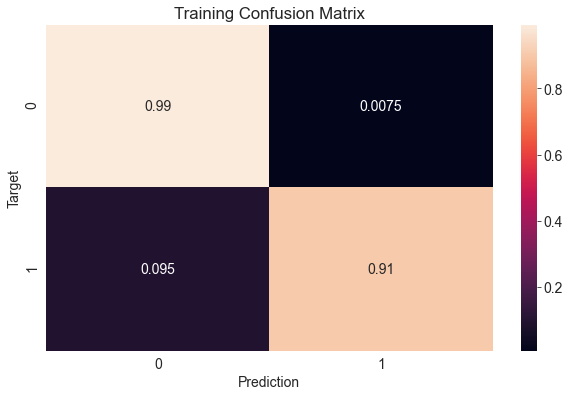

In [83]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 97.90%


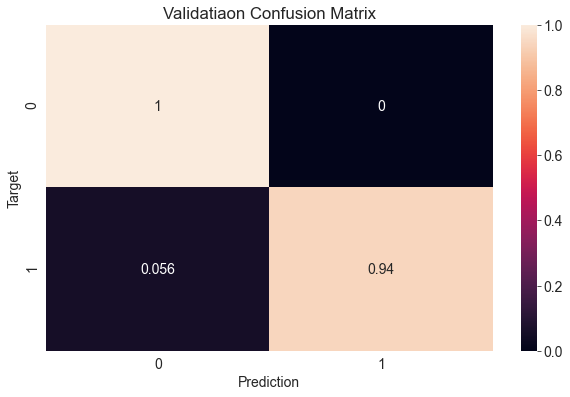

In [84]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 97.37%


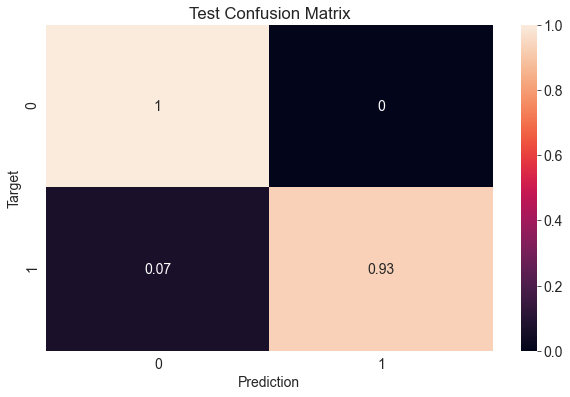

In [85]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

Lets check for dumb model

In [86]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

In [87]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [88]:
accuracy_score(test_targets, random_guess(X_test))

0.4649122807017544

In [89]:
accuracy_score(test_targets, all_no(X_test))

0.6228070175438597

Our model is better than the dumb model

let's see after dropping the worst columns and collinear columns what is the accuracy

In [90]:
df2=df.copy()

In [91]:
df2.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [92]:
df2.drop(df2[features_worst],axis=1,inplace=True)

In [93]:
df2.drop(['perimeter_mean','area_mean','smoothness_mean','concavity_mean','concave points_mean','fractal_dimension_mean'],axis=1,inplace=True)

In [94]:
df2.drop(['perimeter_se','area_se','smoothness_se','concavity_se','concave points_se','fractal_dimension_se'],axis=1,inplace=True)

In [95]:
df2.head()

diagnosis  radius_mean  texture_mean  compactness_mean  symmetry_mean  \
0          1        17.99         10.38           0.27760         0.2419   
1          1        20.57         17.77           0.07864         0.1812   
2          1        19.69         21.25           0.15990         0.2069   
3          1        11.42         20.38           0.28390         0.2597   
4          1        20.29         14.34           0.13280         0.1809   

   radius_se  texture_se  compactness_se  symmetry_se  
0     1.0950      0.9053         0.04904      0.03003  
1     0.5435      0.7339         0.01308      0.01389  
2     0.7456      0.7869         0.04006      0.02250  
3     0.4956      1.1560         0.07458      0.05963  
4     0.7572      0.7813         0.02461      0.01756

by using these columns lets prepare the model

In [96]:
train_val_df2, test_df2 = train_test_split(df2, test_size=0.2, random_state=42)
train_df2, val_df2 = train_test_split(train_val_df2, test_size=0.25, random_state=42)

In [97]:
print('train_df.shape :', train_df2.shape)
print('val_df.shape :', val_df2.shape)
print('test_df.shape :', test_df2.shape)

train_df.shape : (341, 9)
val_df.shape : (114, 9)
test_df.shape : (114, 9)


In [98]:
input_cols2 = list(train_df2.columns)[1:]
target_col2 = 'diagnosis'

In [99]:
print(input_cols2)

['radius_mean', 'texture_mean', 'compactness_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'compactness_se', 'symmetry_se']


In [100]:
print(target_col2)

diagnosis


In [101]:
train_inputs2 = train_df2[input_cols2].copy()
train_targets2 = train_df2[target_col2].copy()

In [102]:
val_inputs2 = val_df2[input_cols2].copy()
val_targets2 = val_df2[target_col2].copy()

In [103]:
test_inputs2 = test_df2[input_cols2].copy()
test_targets2 = test_df2[target_col2].copy()

In [104]:
numeric_cols2 = train_inputs2.select_dtypes(include=np.number).columns.tolist()
categorical_cols2 = train_inputs2.select_dtypes('object').columns.tolist()

In [105]:
numeric_cols2

['radius_mean',
 'texture_mean',
 'compactness_mean',
 'symmetry_mean',
 'radius_se',
 'texture_se',
 'compactness_se',
 'symmetry_se']

scaling

In [106]:
df2[numeric_cols2].describe()

radius_mean  texture_mean  compactness_mean  symmetry_mean   radius_se  \
count   569.000000    569.000000        569.000000     569.000000  569.000000   
mean     14.127292     19.289649          0.104341       0.181162    0.405172   
std       3.524049      4.301036          0.052813       0.027414    0.277313   
min       6.981000      9.710000          0.019380       0.106000    0.111500   
25%      11.700000     16.170000          0.064920       0.161900    0.232400   
50%      13.370000     18.840000          0.092630       0.179200    0.324200   
75%      15.780000     21.800000          0.130400       0.195700    0.478900   
max      28.110000     39.280000          0.345400       0.304000    2.873000   

       texture_se  compactness_se  symmetry_se  
count  569.000000      569.000000   569.000000  
mean     1.216853        0.025478     0.020542  
std      0.551648        0.017908     0.008266  
min      0.360200        0.002252     0.007882  
25%      0.833900        0.013080     0.015160  
50%      1.108000        0.020450     0.018730  
75%      1.474000        0.032450     0.023480  
max      4.885000        0.135400     0.078950

In [107]:
scaler2 = MinMaxScaler()

In [108]:
scaler2.fit(df2[numeric_cols2])

MinMaxScaler()

In [109]:
train_inputs2[numeric_cols2] = scaler2.transform(train_inputs2[numeric_cols2])
val_inputs2[numeric_cols2] = scaler2.transform(val_inputs2[numeric_cols2])
test_inputs2[numeric_cols2] = scaler2.transform(test_inputs2[numeric_cols2])

In [110]:
model2 = LogisticRegression(solver='liblinear')

In [111]:
model2.fit(train_inputs2[numeric_cols2], train_targets2)

LogisticRegression(solver='liblinear')

In [112]:
print(numeric_cols2)

['radius_mean', 'texture_mean', 'compactness_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'compactness_se', 'symmetry_se']


In [113]:
print(model2.coef_.tolist())

[[4.726515006766476, 2.3185892739479725, 3.448892112332673, 0.9278899593141228, 2.1775516935479997, -1.007288973023551, 0.1186313723937694, -0.7299721400793137]]


In [114]:
print(model2.intercept_)

[-4.04888251]


Making predictions and evaluating the model

In [115]:
X_train2 = train_inputs2[numeric_cols2]
X_val2 = val_inputs2[numeric_cols2]
X_test2 = test_inputs2[numeric_cols2]

In [116]:
train_preds2= model2.predict(X_train2)

In [117]:
train_preds2

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [118]:
train_targets2

217    0
283    1
0      1
504    0
251    0
      ..
57     1
492    1
418    0
385    1
325    0
Name: diagnosis, Length: 341, dtype: int64

In [119]:
train_probs2 = model2.predict_proba(X_train2)
train_probs2

array([[0.89903659, 0.10096341],
       [0.31036324, 0.68963676],
       [0.09085496, 0.90914504],
       [0.640977  , 0.359023  ],
       [0.83116504, 0.16883496],
       [0.88050256, 0.11949744],
       [0.79186135, 0.20813865],
       [0.75730309, 0.24269691],
       [0.53423255, 0.46576745],
       [0.83679758, 0.16320242],
       [0.87246257, 0.12753743],
       [0.45088372, 0.54911628],
       [0.81237658, 0.18762342],
       [0.60634125, 0.39365875],
       [0.83004604, 0.16995396],
       [0.32716877, 0.67283123],
       [0.89986533, 0.10013467],
       [0.90088459, 0.09911541],
       [0.78082881, 0.21917119],
       [0.08821693, 0.91178307],
       [0.8705859 , 0.1294141 ],
       [0.87220581, 0.12779419],
       [0.88860097, 0.11139903],
       [0.23572838, 0.76427162],
       [0.73810257, 0.26189743],
       [0.84399489, 0.15600511],
       [0.82156094, 0.17843906],
       [0.94249442, 0.05750558],
       [0.60994774, 0.39005226],
       [0.90058922, 0.09941078],
       [0.

In [120]:
model2.classes_

array([0, 1], dtype=int64)

In [121]:
accuracy_score(train_targets2, train_preds2)

0.906158357771261

In [122]:
confusion_matrix(train_targets2, train_preds2, normalize='true')

array([[0.98148148, 0.01851852],
       [0.224     , 0.776     ]])

In [123]:
def predict_and_plot2(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [124]:
# train_preds2 = predict_and_plot2(X_train2, train_targets2, 'Training')

In [125]:
 model2.score(X_train2, train_targets2)

0.906158357771261

In [126]:
#val_preds2 = predict_and_plot(X_val2, val_targets2, 'Validatiaon')

In [127]:
 model2.score(X_val2, val_targets2)

0.9210526315789473

In [128]:
#test_preds2 = predict_and_plot(X_test2, test_targets2, 'Test')

In [129]:
 model2.score(X_test2, test_targets2)

0.9385964912280702

In [130]:
accuracy_score(test_targets2, random_guess(X_test2))

0.5087719298245614

In [131]:
accuracy_score(test_targets2, all_no(X_test2))

0.6228070175438597

the second model shows the accuracy after removing columns with high collinearity


In [132]:
from sklearn.metrics import confusion_matrix, classification_report

In [133]:
sample_input=[[30,4,2,6,0.2,30,0.2,0.2]]

In [134]:
sample_output =  model2.predict(sample_input)

In [135]:
if sample_output==1:
    print("Cancer Occurs")
else:
    print("Cancer does not occur")

Cancer Occurs


we will try the prediction using decision tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
model3 = DecisionTreeClassifier(random_state=42)

In [138]:
%%time
model3.fit(X_train, train_targets)

Wall time: 12 ms


DecisionTreeClassifier(random_state=42)

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [140]:
train_preds = model3.predict(X_train)

In [141]:
train_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [142]:
pd.value_counts(train_preds)

0    268
1    158
dtype: int64

In [143]:
train_probs = model3.predict_proba(X_train)

In [144]:

train_probs

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [145]:
accuracy_score(train_targets, train_preds)

1.0

In [146]:
model.score(X_val, val_targets)

0.9790209790209791

In [147]:
val_targets.value_counts() / len(val_targets)

0    0.622378
1    0.377622
Name: diagnosis, dtype: float64

In [148]:
from sklearn.tree import plot_tree, export_text

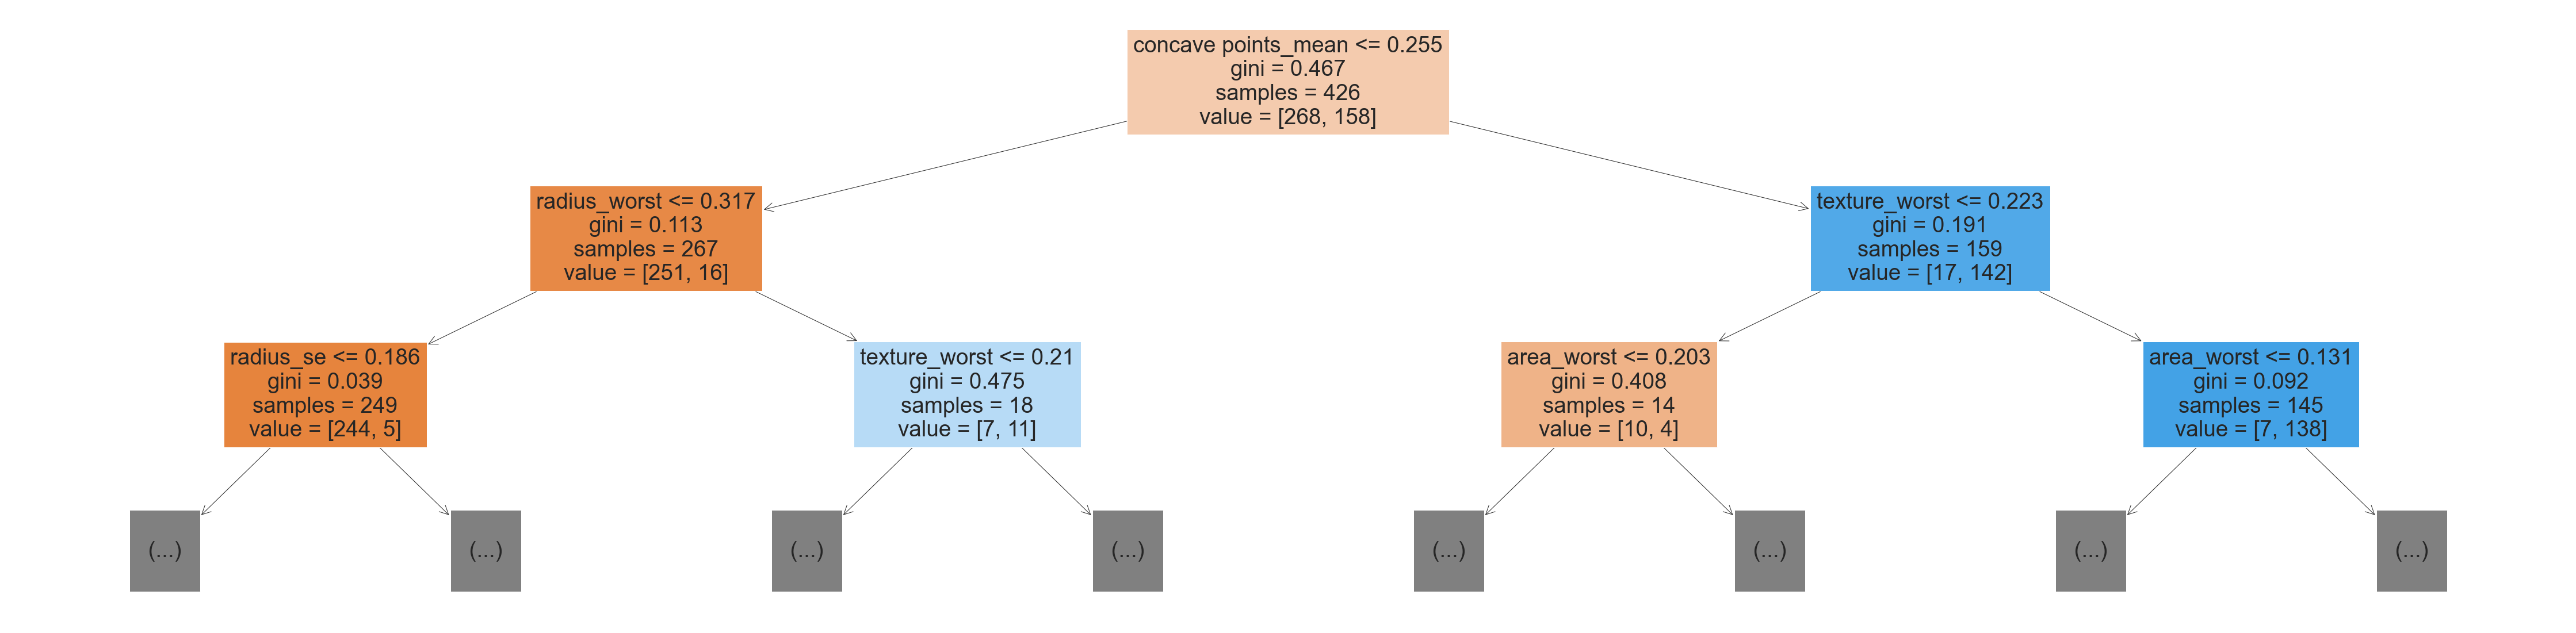

In [149]:
plt.figure(figsize=(80,20))
plot_tree(model3, feature_names=X_train.columns, max_depth=2, filled=True);

In [150]:
model3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00670697, 0.69593688, 0.00838371, 0.        ,
       0.01277192, 0.        , 0.        , 0.        , 0.00155458,
       0.        , 0.        , 0.01702539, 0.        , 0.        ,
       0.05899273, 0.12550655, 0.        , 0.06326461, 0.00985664,
       0.        , 0.        , 0.        ])

In [151]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model3.feature_importances_
}).sort_values('importance', ascending=False)

In [152]:
importance_df.head(10)

feature  importance
7   concave points_mean    0.695937
21        texture_worst    0.125507
23           area_worst    0.063265
20         radius_worst    0.058993
17    concave points_se    0.017025
10            radius_se    0.012772
24     smoothness_worst    0.009857
8         symmetry_mean    0.008384
6        concavity_mean    0.006707
14        smoothness_se    0.001555

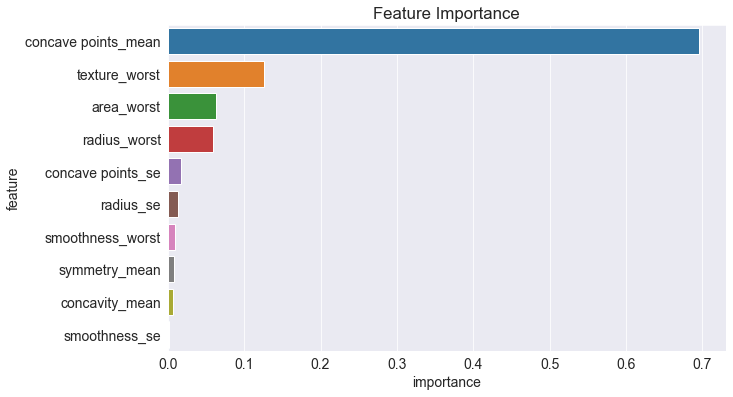

In [153]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Training a random forest model

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
model4 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [156]:
%%time
model4.fit(X_train, train_targets)

Wall time: 220 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [157]:
model4.score(X_train, train_targets)

1.0

In [158]:
model4.score(X_val, val_targets)

0.965034965034965

In [159]:
train_probs = model4.predict_proba(X_train)
train_probs

array([[1.  , 0.  ],
       [0.02, 0.98],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.16, 0.84],
       [1.  , 0.  ],
       [0.07, 0.93],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.18, 0.82],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.8 , 0.2 ],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.84, 0.16],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.19, 0.81],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.9 , 0.1 ],
       [0.99, 0.01],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.  ,

In [160]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model4.feature_importances_
}).sort_values('importance', ascending=False)

In [161]:
importance_df.head(10)

feature  importance
27  concave points_worst    0.147765
22       perimeter_worst    0.136227
7    concave points_mean    0.131426
23            area_worst    0.115602
20          radius_worst    0.077950
6         concavity_mean    0.063997
26       concavity_worst    0.041218
13               area_se    0.041047
2         perimeter_mean    0.032844
0            radius_mean    0.027800

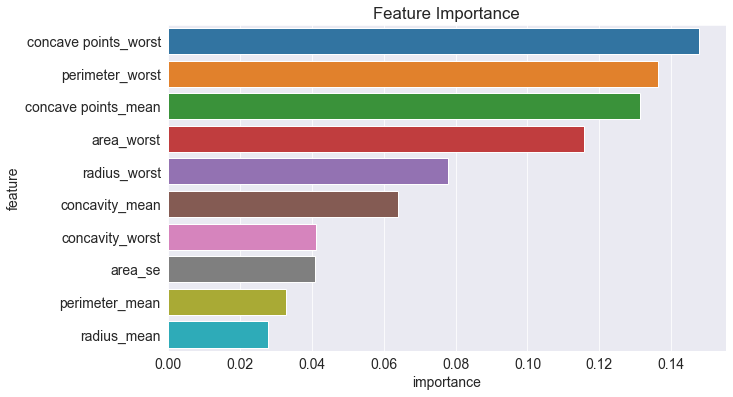

In [162]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [163]:
model4.score(X_test,test_targets)

0.956140350877193

Now using random forest classifier and using only important columns

In [164]:
model5 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [165]:
%%time
model5.fit(X_train2, train_targets2)

Wall time: 247 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [166]:
model5.score(X_train2, train_targets2)

1.0

In [167]:
model5.score(X_val2, val_targets2)

0.9385964912280702

In [168]:
model5.score(X_test2, test_targets2)

0.956140350877193